In [2]:
import pandas as pd

# Data Cleaning

In [3]:
# read scores and info tables as dataframe
scores = pd.read_csv('./results/fct_scores.csv')
patients = pd.read_csv('./results/test_patients_info.csv')
patients.head()

,patient_id,group,bmi_category,bmi,height,weight,nb_frame,ed,es
0,101,DCM,Overweight,27.660096,169.0,79.0,30,1,14
1,102,NOR,Obesity,30.818540,156.0,75.0,30,1,13
2,103,MINF,Obesity,34.938776,175.0,107.0,30,1,11
3,104,HCM,Healthy,22.839506,180.0,74.0,30,1,11
4,105,HCM,Overweight,28.066424,173.0,84.0,30,1,10


In [4]:
scores.head()

,patient_id,slice_id,dice_avg,dice_lv,dice_rv,dice_myo
0,101,2,0.715404,0.753115,0.877170,0.515927
1,101,3,0.752699,0.773758,0.859139,0.625201
2,101,4,0.769271,0.782025,0.883813,0.641975
3,101,5,0.769783,0.833599,0.807370,0.668380
4,101,6,0.797083,0.900846,0.752270,0.738134


In [13]:
# merge scores and info tables on patient id
merged = pd.merge(scores, patients, on='patient_id')
merged.head()

,patient_id,slice_id,dice_avg,dice_lv,dice_rv,dice_myo,group,bmi_category,bmi,height,weight,nb_frame,ed,es
0,101,2,0.715404,0.753115,0.877170,0.515927,DCM,Overweight,27.660096,169.0,79.0,30,1,14
1,101,3,0.752699,0.773758,0.859139,0.625201,DCM,Overweight,27.660096,169.0,79.0,30,1,14
2,101,4,0.769271,0.782025,0.883813,0.641975,DCM,Overweight,27.660096,169.0,79.0,30,1,14
3,101,5,0.769783,0.833599,0.807370,0.668380,DCM,Overweight,27.660096,169.0,79.0,30,1,14
4,101,6,0.797083,0.900846,0.752270,0.738134,DCM,Overweight,27.660096,169.0,79.0,30,1,14


In [19]:
# performance per bmi category
bmi = merged[['bmi_category', 'group', 'dice_avg', 'dice_lv', 'dice_myo', 'dice_rv']]
bmi.head()

,bmi_category,group,dice_avg,dice_lv,dice_myo,dice_rv
0,Overweight,DCM,0.715404,0.753115,0.515927,0.877170
1,Overweight,DCM,0.752699,0.773758,0.625201,0.859139
2,Overweight,DCM,0.769271,0.782025,0.641975,0.883813
3,Overweight,DCM,0.769783,0.833599,0.668380,0.807370
4,Overweight,DCM,0.797083,0.900846,0.738134,0.752270


In [20]:
bmi.describe()

,dice_avg,dice_lv,dice_myo,dice_rv
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.699278e-01,7.220175e-01,6.127631e-01,6.750029e-01
std,2.316635e-01,2.799718e-01,2.646047e-01,3.375262e-01
min,8.601140e-10,7.627765e-10,1.278772e-09,3.084516e-10
25%,5.589137e-01,6.475997e-01,4.936433e-01,5.655872e-01
50%,7.314361e-01,8.252185e-01,6.991565e-01,8.225059e-01
75%,8.400496e-01,9.143329e-01,7.991759e-01,9.119601e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
bmi.groupby('bmi_category').mean(numeric_only=True)

,dice_avg,dice_lv,dice_myo,dice_rv
bmi_category,,,,
Healthy,0.663480,0.710110,0.579973,0.700356
Obesity,0.676973,0.737451,0.624102,0.669367
Overweight,0.678846,0.729526,0.651136,0.655876
Underweight,0.554858,0.596202,0.517139,0.551232


In [22]:
bmi.mean(numeric_only=True)

dice_avg    0.669928
dice_lv     0.722018
dice_myo    0.612763
dice_rv     0.675003
dtype: float64

# Analysis

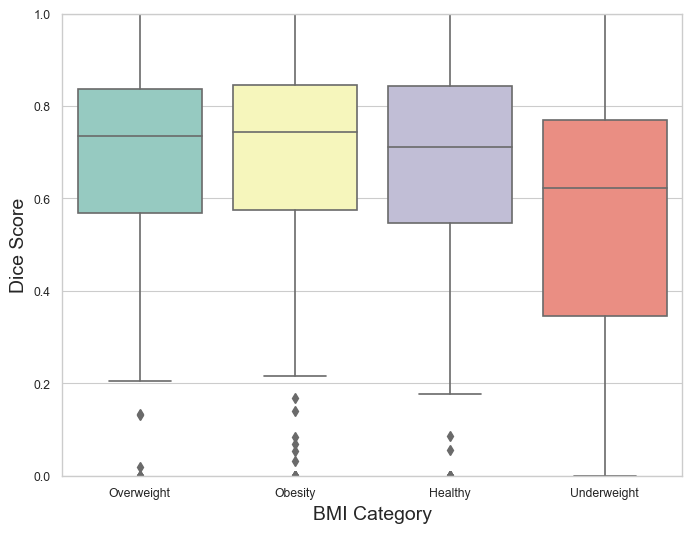

In [25]:
# plot dice scores per bmi category
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("paper")

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="bmi_category", y="dice_avg", data=bmi, palette="Set3")
ax.set_xlabel('BMI Category', fontsize=14)
ax.set_ylabel('Dice Score', fontsize=14)
ax.set_ylim([0, 1.0])
plt.show()
